<a href="https://colab.research.google.com/github/chiundidza/SALARIES-DATASET/blob/master/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -qU tensorflow==2.0.0a0

    100% |████████████████████████████████| 79.9MB 110kB/s 
    100% |████████████████████████████████| 3.0MB 5.5MB/s 
    100% |████████████████████████████████| 61kB 20.7MB/s 
    100% |████████████████████████████████| 419kB 15.0MB/s 


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle Boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

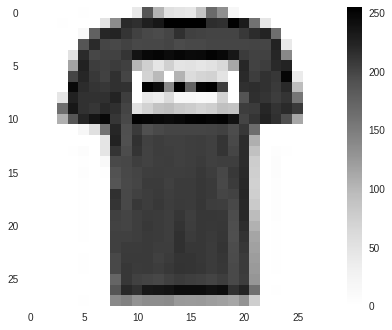

In [10]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()


In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

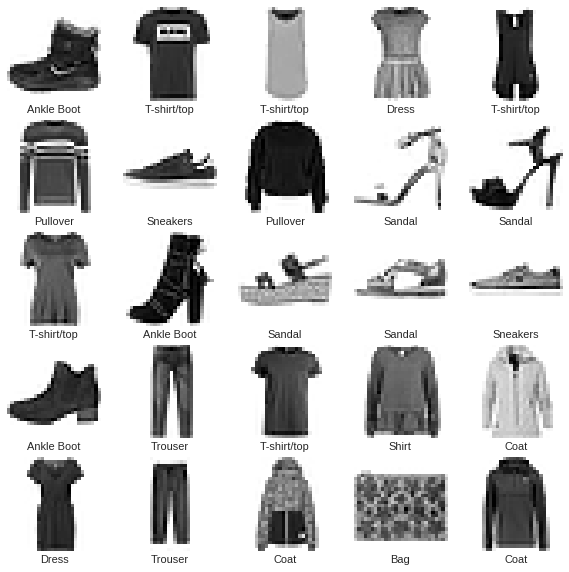

In [13]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.4964 - acc: 0.8243
Epoch 2/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3715 - acc: 0.8664
Epoch 3/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3359 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3103 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2931 - acc: 0.8917


In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test Accuracy:', test_acc)

10000/10000 [==============================] - 1s 74us/sample - loss: 0.3501 - acc: 0.8742
Test Accuracy: 0.8742


In [0]:
predictions = model.predict(test_images)

In [21]:
predictions[0]

array([2.1239328e-05, 4.2101199e-08, 1.7990995e-05, 1.8844675e-07,
       2.0156558e-06, 1.0961180e-02, 8.0832302e-05, 1.0428778e-01,
       9.1943410e-05, 8.8453680e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img=predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
                                      color = color)
  
  

In [0]:

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

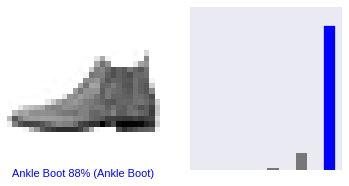

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

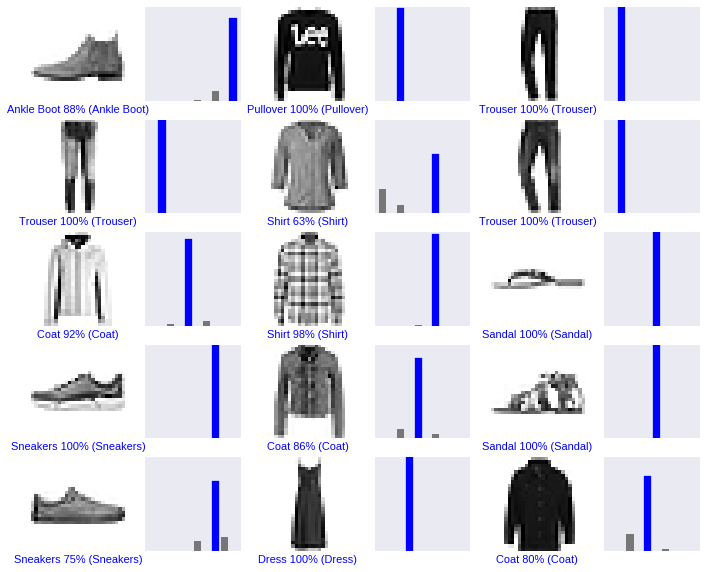

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [30]:
img = test_images[0]
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.12393334e-05 4.21012096e-08 1.79910003e-05 1.88446805e-07
  2.01565263e-06 1.09611787e-02 8.08322511e-05 1.04287565e-01
  9.19434387e-05 8.84537041e-01]]


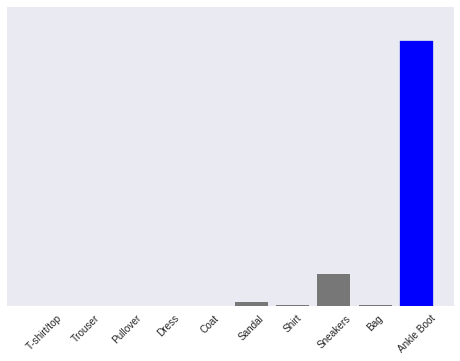

In [32]:
plot_value_array(0, predictions_single, test_labels)
_=plt.xticks(range(10), class_names, rotation=45)